In [154]:
#load and read the data 
import csv
import pandas as pd
data = pd.read_csv('/Users/ximeiwu/Desktop/143 project/sales_data.csv')
df_dropped_na=data.dropna(subset=['1'])
df_dropped_na = df_dropped_na.set_index('TokenID')

In [155]:
#fill all the NaNs with 10000
df_dropped_na_filled=df_dropped_na.fillna(10000)

In [157]:
#get the index of the monotonically increasing price's token
newDF=df_dropped_na_filled.apply(lambda x: x.is_monotonic_increasing, axis=1)
group = newDF.groupby(newDF.values)
monotonically_increasing_index=group.get_group(True).index

In [158]:
#load the traits data
data = pd.read_csv('/Users/ximeiwu/Desktop/143 project/trait_data_file.csv')
data = data.set_index('TokenID')

In [159]:
#the plot function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def plot(df,feature):
    '''
    The function takes in
    a dataframe that consists
    of traits and a particular
    feature that we want
    to plot as a histogram.

    Parameters
    ----------
    df : pandas Dataframe
        Consists of traits of
        the NFTs.
    feature : String
        Name of the feature
        that we want to plot.

    Returns
    -------
    None.

    '''
    assert isinstance(df,pd.DataFrame)
    assert isinstance(feature,str)
    
    traits = set(('Background','Fur','Mouth','Eyes','Earring','Clothes','Hat'))
    
    assert feature in traits
    
    values = Counter(df[feature].values.flatten())
    
    plt.figure(figsize=(20,3))
    plt.bar(values.keys(),values.values(),width=0.5)
    plt.xticks(range(len(values)),values.keys(),rotation=60)
    plt.title(feature)


In [127]:
#the plot function
def barplot_traits(x):
    #x is the dataframe for the desired token IDs
    traits_list = ['Background','Fur','Mouth','Eyes','Earring','Clothes','Hat']
    for i in traits_list:
        plot(x,i)

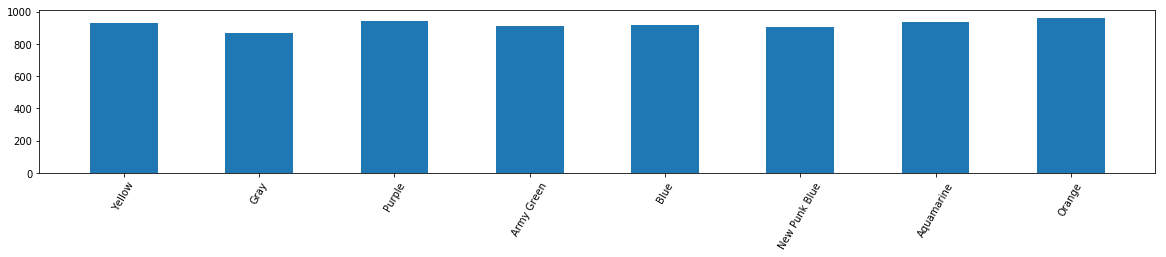

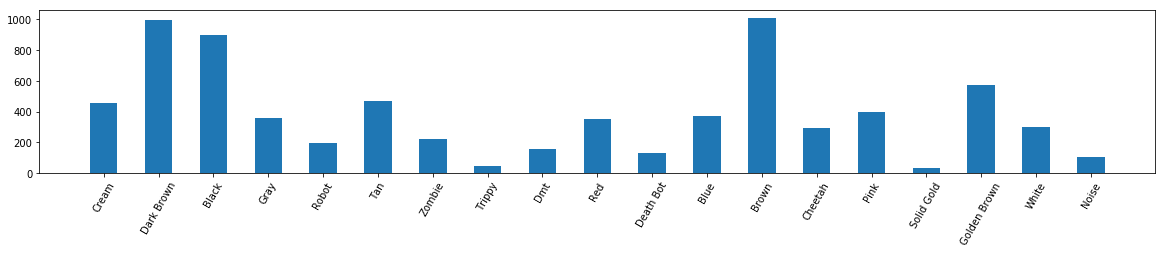

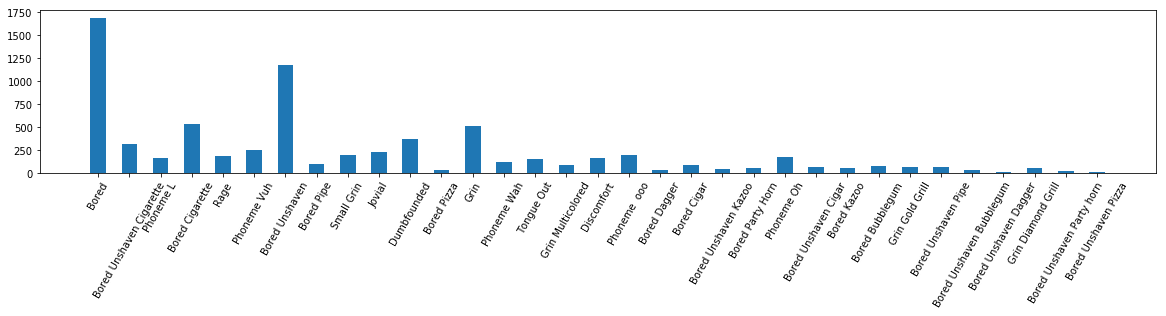

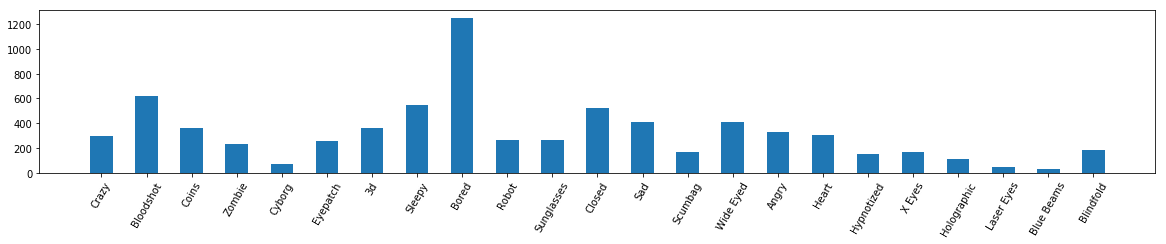

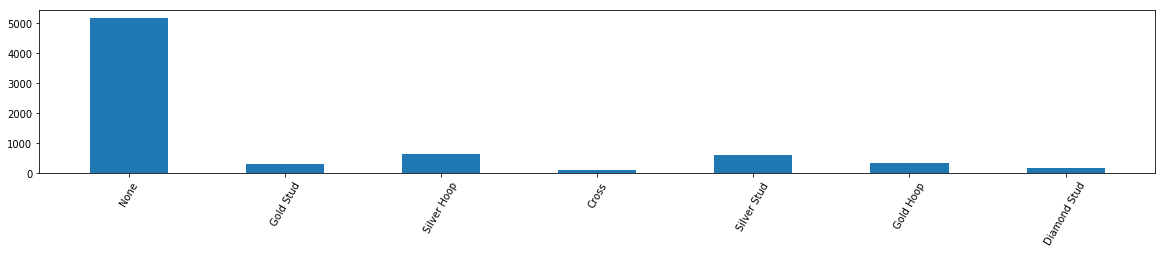

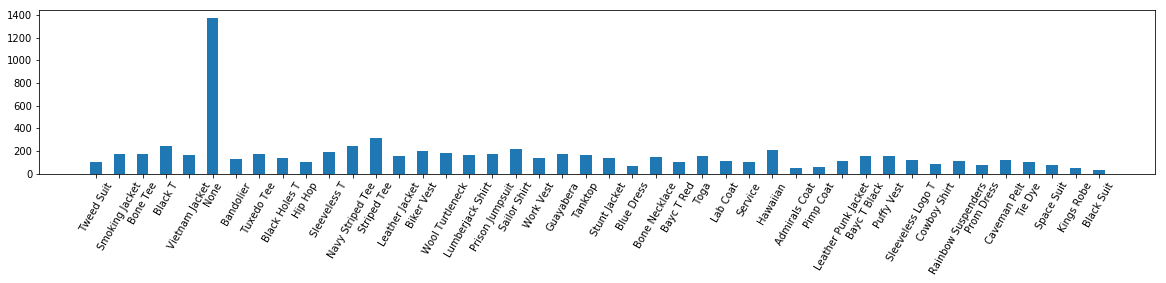

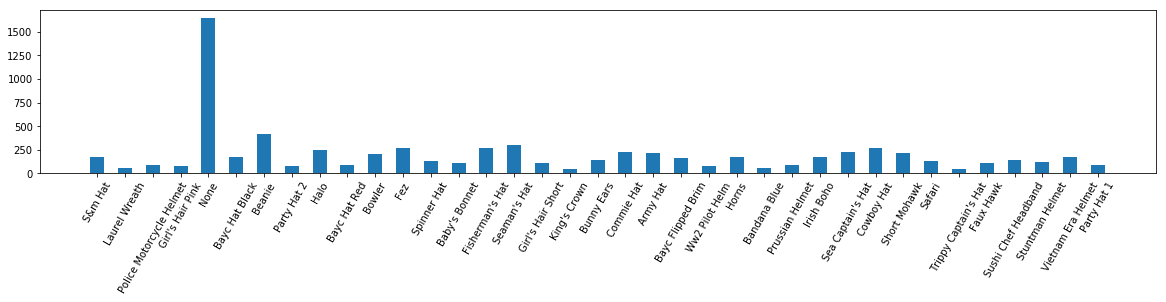

In [122]:
#plots for monotonnically increasing tokens
traits_increasing = data.loc[monotonically_increasing_index]
traits_list = ['Background','Fur','Mouth','Eyes','Earring','Clothes','Hat']
for i in traits_list:
    plot(traits_increasing,i)

In [165]:
def grouping(value):
    '''
    Function returns the
    group number depending
    on range. If value is 0
    return 0. If value is in
    [1,4] return 1, [5,9] return
    2 and [10,14] return 3

    Parameters
    ----------
    value : int

    Returns
    -------
    Group by value.

    '''
    if value==0:
        return '0'
    if value in range(1,5):
        return '1'
    if value in range(5,10):
        return '2'
    if value in range(10,15):
        return '3'


In [166]:
count = sales.count(axis='columns')
groups = count.groupby(by=lambda i:grouping(count.loc[i]))
not_sold_index = groups.get_group('0').index
one_to_four_sold_index = groups.get_group('1').index
five_to_nine_sold_index = groups.get_group('2').index
ten_plus_sold_index = groups.get_group('3').index

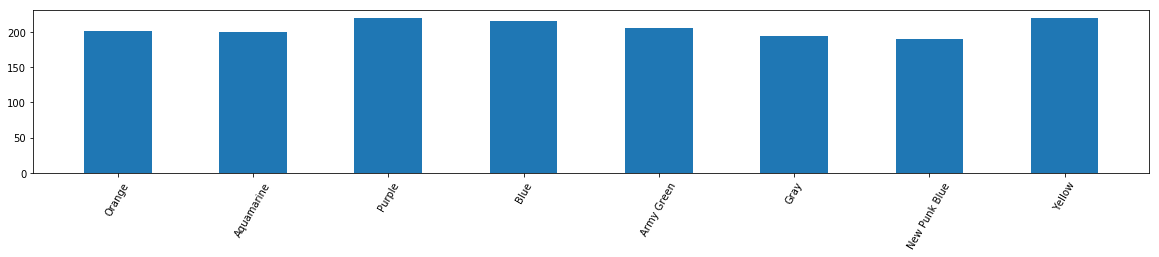

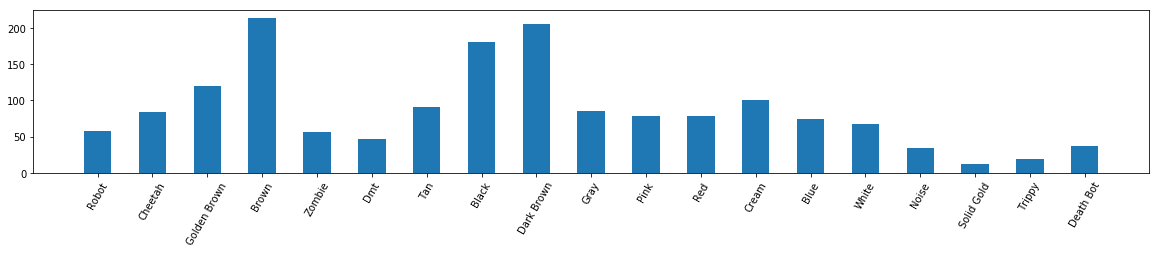

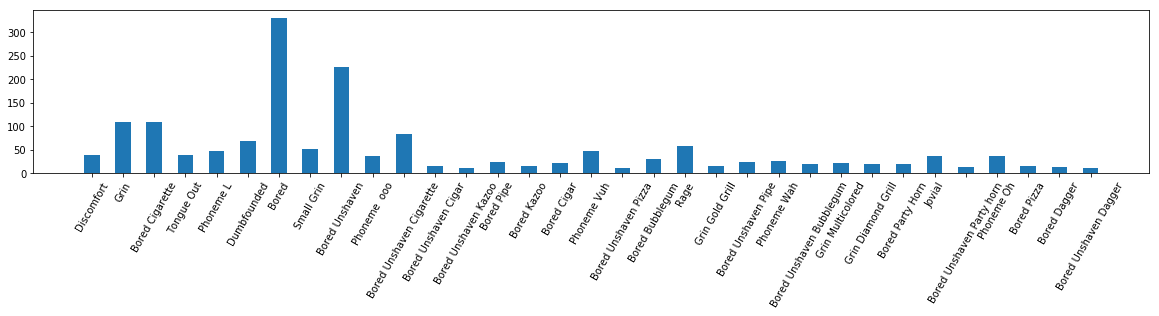

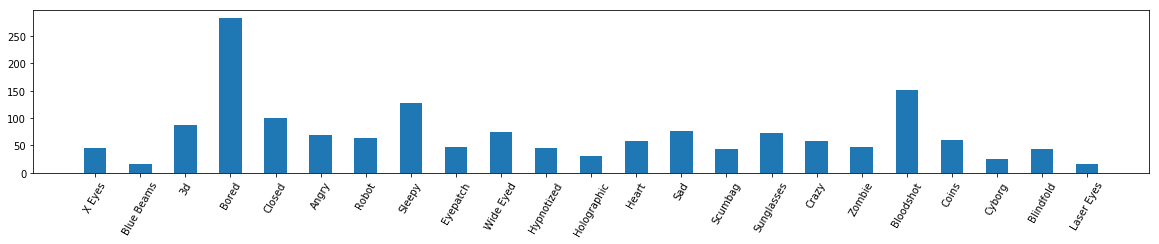

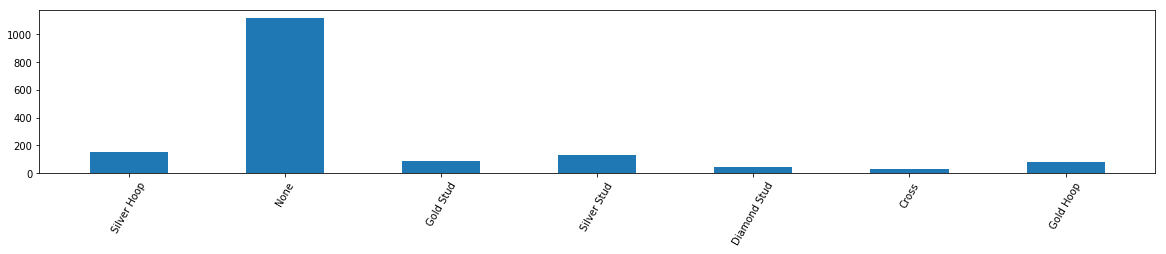

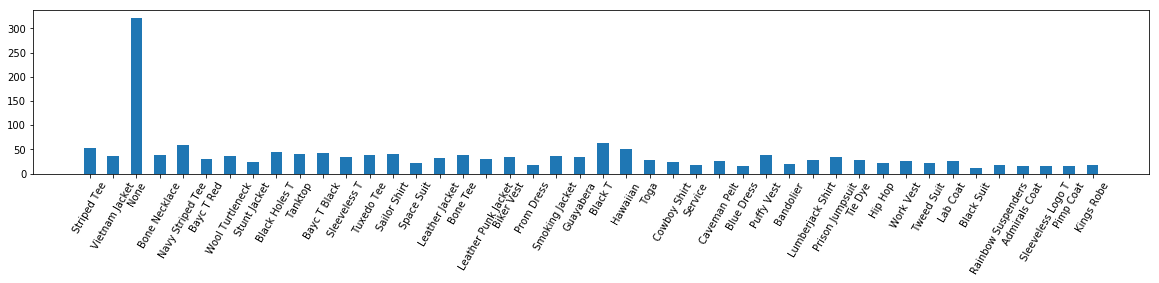

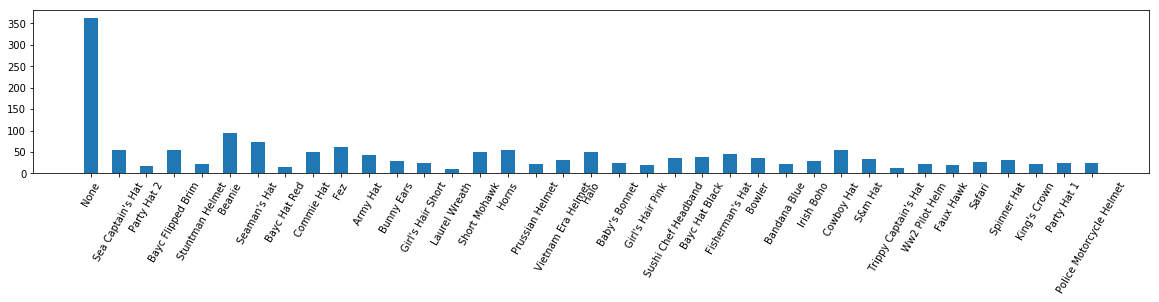

In [128]:
# plots for tokens sold 0 times
sales = pd.read_csv('/Users/ximeiwu/Desktop/143 project/sales_data.csv')
sales = sales.set_index('TokenID')
no_sold = sales.groupby(by = lambda i:np.all(sales.loc[i].isna()))
indices = no_sold.get_group(True).index
traits_not_sold = data.loc[indices]
barplot_traits(traits_not_sold)

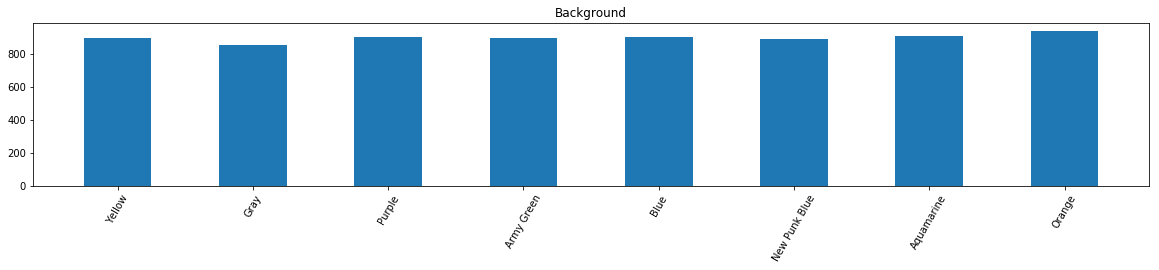

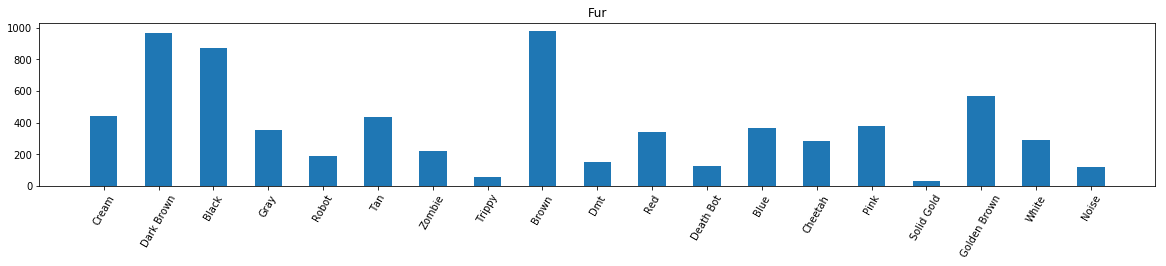

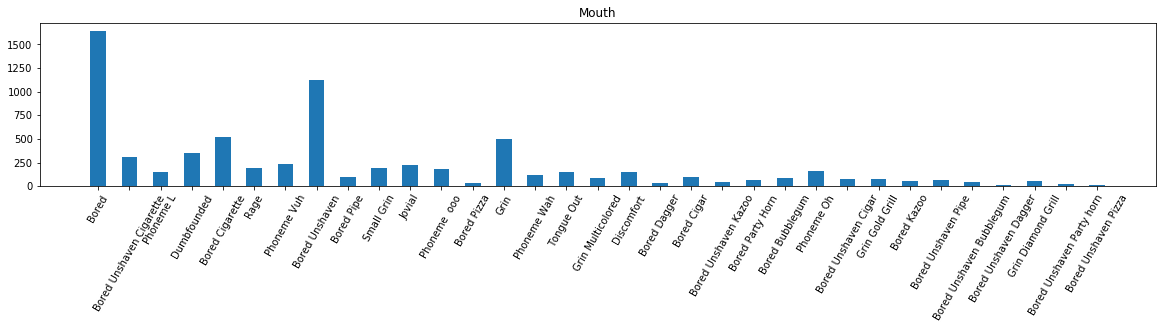

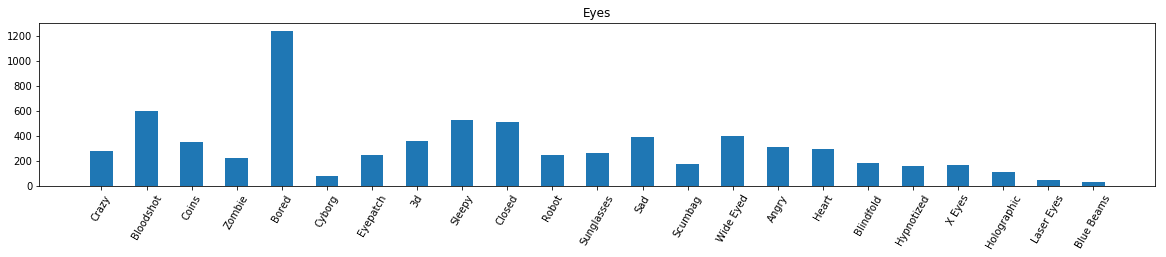

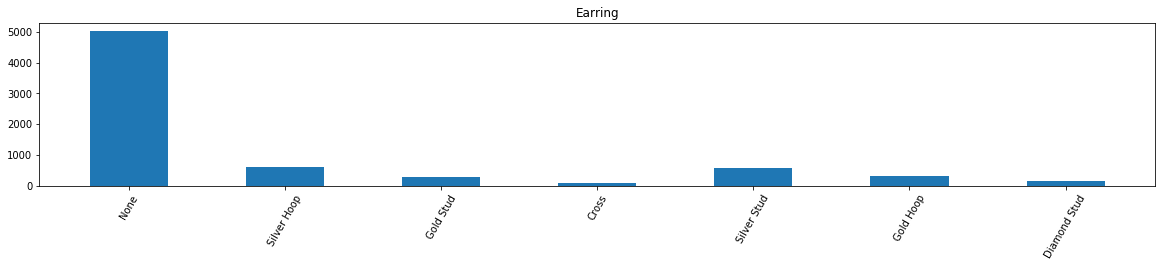

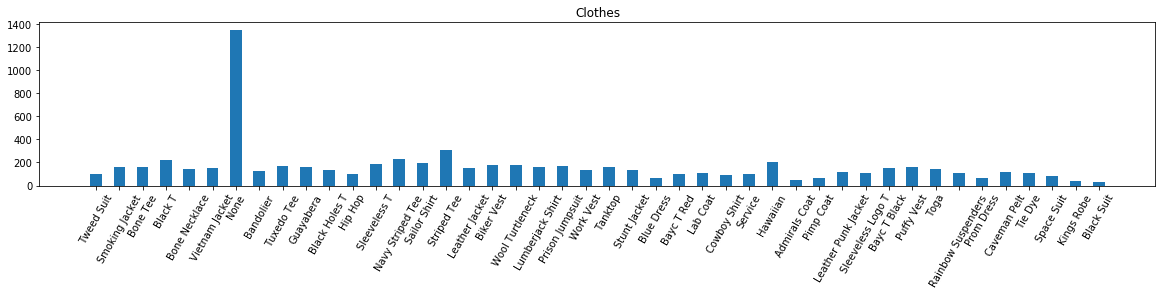

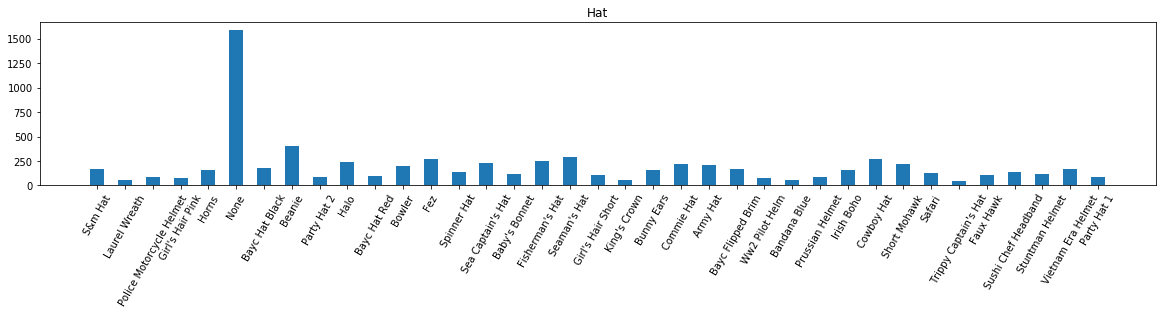

In [169]:
# plots for tokens sold 1-4 times
one_to_four_traits = data.loc[one_to_four_sold_index]
barplot_traits(one_to_four_traits)

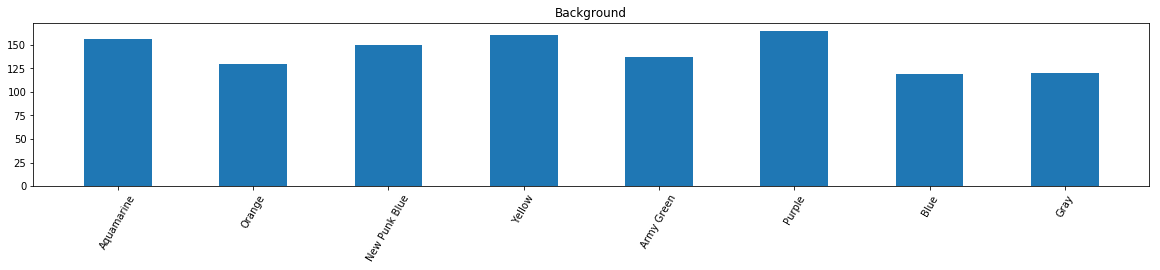

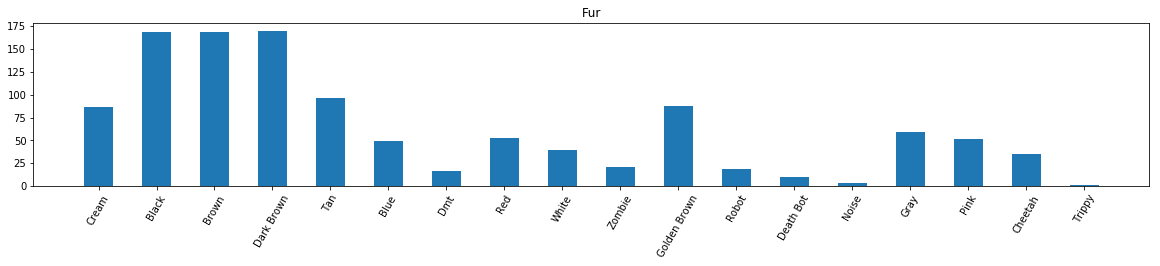

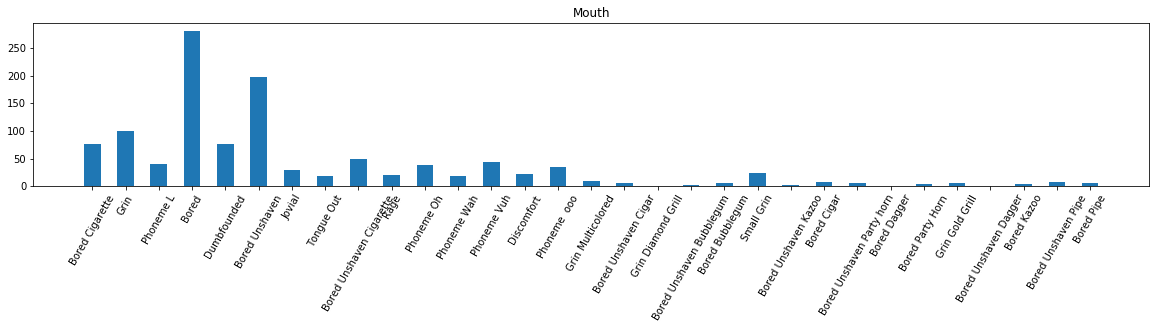

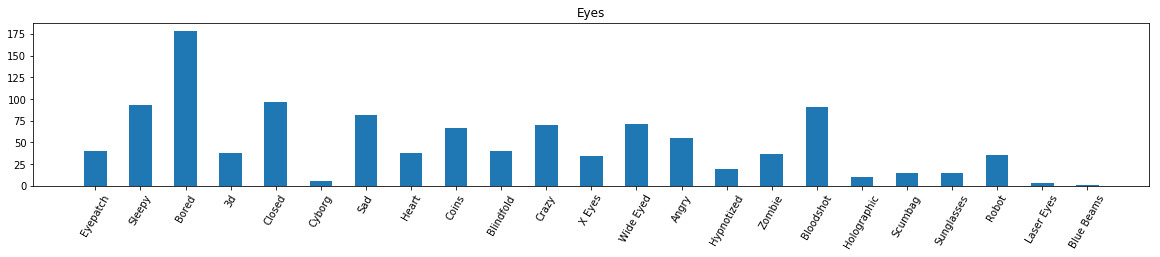

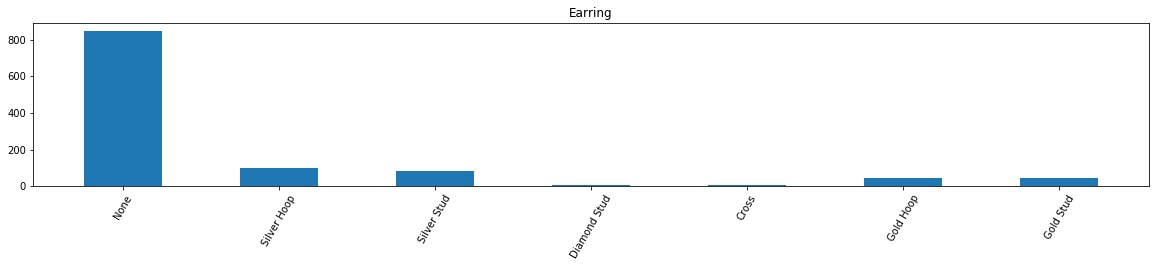

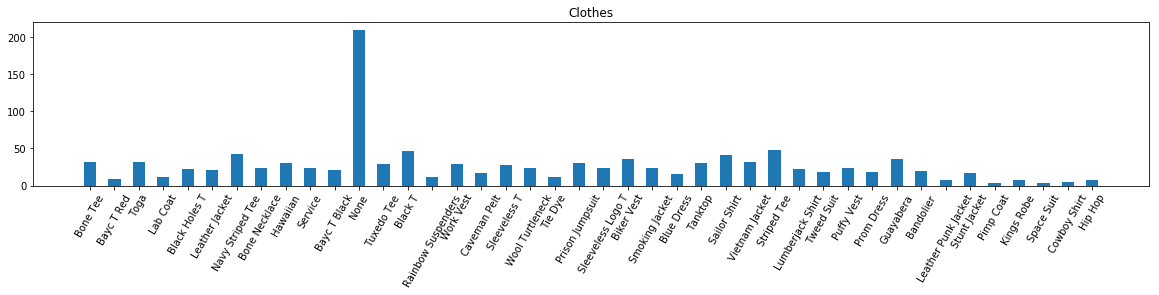

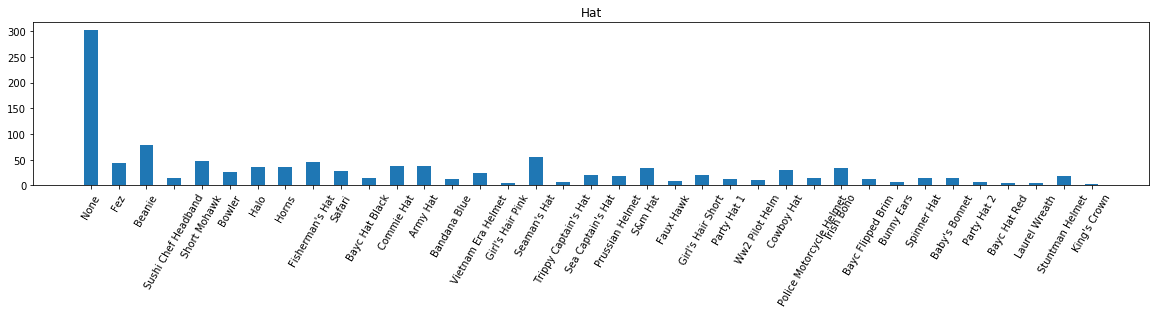

In [168]:
# plots for tokens sold 5-9 times
five_to_nine_traits = data.loc[five_to_nine_sold_index]
barplot_traits(five_to_nine_traits)

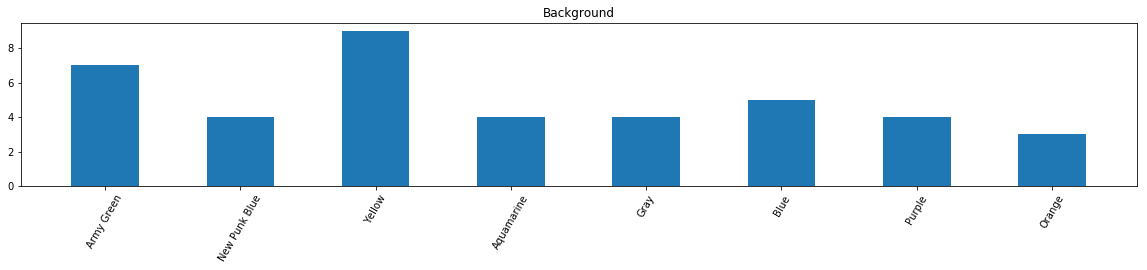

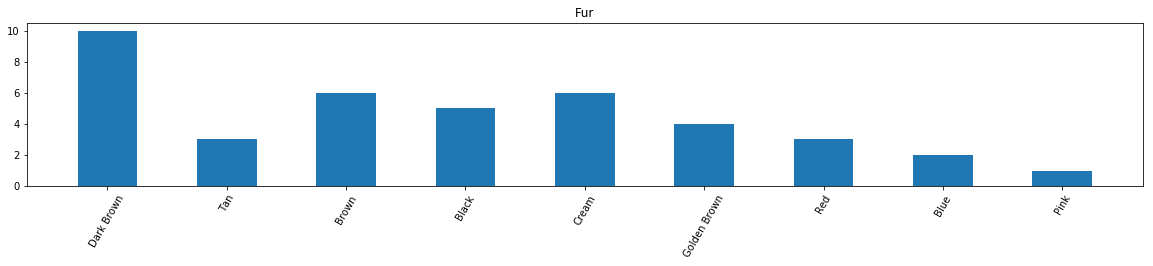

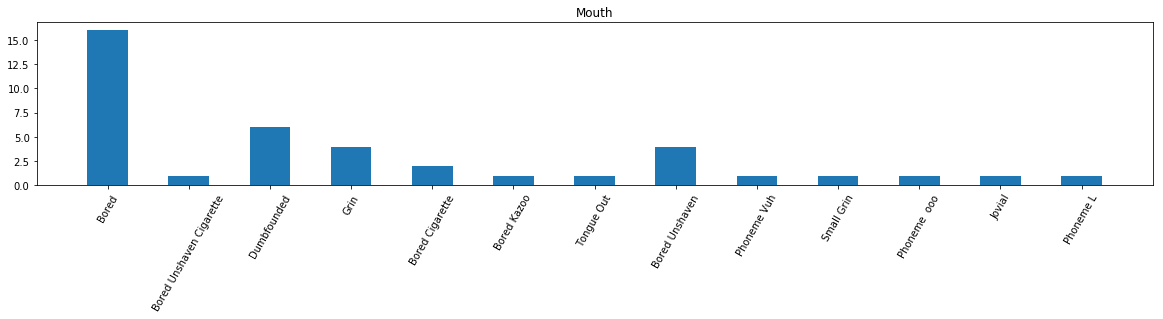

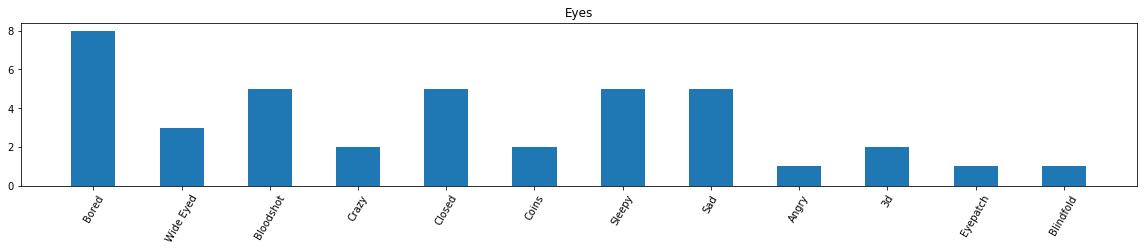

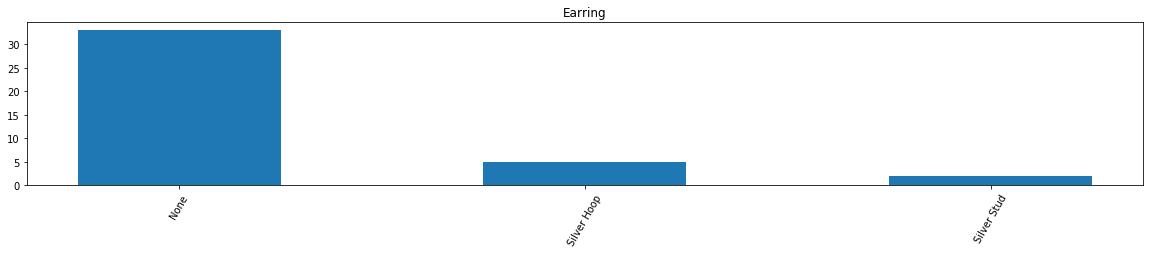

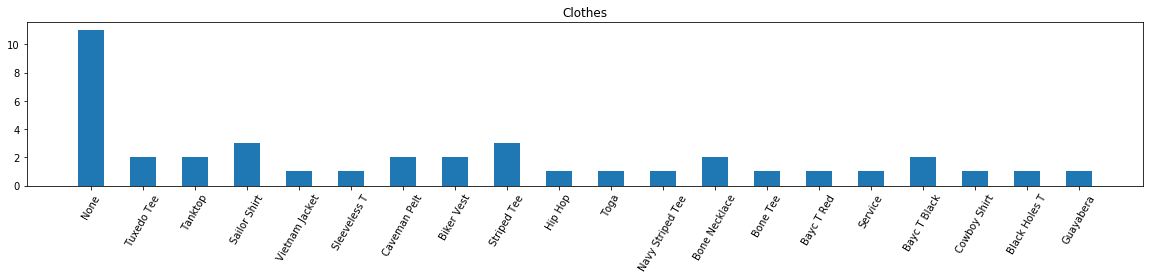

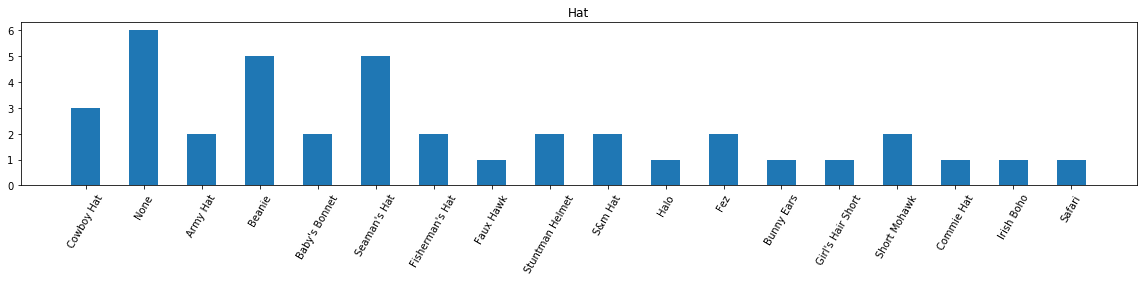

In [167]:
# plots for tokens sold 10+ times
ten_plus_traits = data.loc[ten_plus_sold_index]
barplot_traits(ten_plus_traits)